### 완전탐색

* 완전탐색 이란 기본적으로 컴퓨터의 계산 능력을 이용해 무식하게 가능한 모든경우의 수를 일일이 나열해서 방법을 찾아내는 것을 의미합니다.
* 그래서 무식하게 푼다의 Brute-Force 라고도 불립니다.
* 이러한 방식은 모든 방법을 다 나열하기 때문에 어떻게든 답을 찾아낸다는 점이 있지만 반대로 모든 방법을 다 나열하기 때문에 시간복잡도 에서 걸리는 경우가 많습니다.
* 이런 이유로 완전탐색을 어디에 언제 써야할지를 잘 파악하는 것이 더욱 도움이 됩니다.


### 완전탐색 기법

* 완전탐색 자체가 알고리즘 이라기 보다 방법의 하나이기 때문에 다음과 같이 여러가지 기법이 이용됩니다.
    - 단순 Brute-Force
    - 재귀 함수
    - 순열
    - 비트마스트

### 1. 단순 Brute-Force
* 특별한 기법을 사용하지 않고 단순히 for문과 if문 설정하여서 모든 방법을 단순히 찾아서 답을 구하는 방법 입니다.
* 이는 기초적인 방법으로 대회나 코테에서는 해당 방법만 이용해서 문제를 풀어내긴 쉽지 않습니다.

### 2. 순열
* 순열이란 중복을 허용하지않고 r개를 뽑아서 나열하게 됩니다. 뽑힌 순서대로 나열하기 때문에 순서에 의미가 있습니다.
* 예시 코드를 보겠습니다.
* 라이브러리로 쉽게 구현이 가능합니다. 재귀함수를 통해서도 구현이 가능하고 해당부분은 바로뒤에서 설명하겠습니다.

In [59]:

# 라이브러리로 구현
import itertools

arr = ['A', 'B', 'C']
nPr = itertools.permutations(arr, 2)
print(list(nPr))

''' 783 ns ± 7.89 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)'''

[('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]


### 3. 재귀 함수
* 재귀함수란 함수 안에서 함수 자기자신을 호출하는 방식을 말합니다.

In [ ]:
def hello():
    print('Hello, world!')
    hello()

hello()

* 위와 같이 끝없이 호출하게 되면 파이썬에서 정한 최대 재귀 깊이인 1000에서 에러가 발생합니다.
* 다음과 같은 그림으로 쉽게 이해할 수 있을거 같습니다.
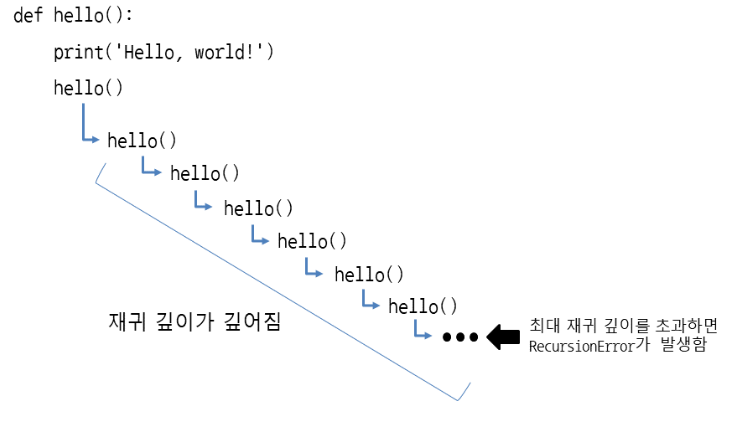
* 그렇기 때문에 꼭 종료 조건을 만들어줘야 합니다.

In [11]:
def hello(count):
    if count == 0:    # 종료 조건을 만듦. count가 0이면 다시 hello 함수를 호출하지 않고 끝냄
        return
    
    print('Hello, world!', count)
    
    count -= 1      # count를 1 감소시킨 뒤
    hello(count)    # 다시 hello에 넣음

hello(5)    # hello 함수 호출

Hello, world! 5
Hello, world! 4
Hello, world! 3
Hello, world! 2
Hello, world! 1


* 그렇다면 순열을 재귀함수로 구현해보겠습니다.
* 아이디어는 
permutation([A, B, C], 2) = ([A],permutation([B, C], 1)) + ([B],permutation([A, D], 1)) + ([C],permutation([A, B], 1))과 같습니다.




In [60]:

def permutation(arr, n):    
    result = []
    # n-1 을 해주기 때문에 n 이 0일때 종료조건
    if n == 0:        
        return [[]]
    
    # arr 갯수만큼 돌면서 자기 자신을 제외하고 다시 재귀호출
    for i in range(len(arr)):
        now = arr[i]
        for temp in permutation(arr[:i] + arr[i+1:], n - 1):
            result.append([now] + temp)    
    return result

permutation(['A','B','C'], 2)

'''2.09 ms ± 8.37 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)'''

[['A', 'B'], ['A', 'C'], ['B', 'A'], ['B', 'C'], ['C', 'A'], ['C', 'B']]

* 시간차이가 상당하기 때문에 라이브러리를 사용하는게 좋을거 같습니다.

### 4. 비트마스크
* 그래서 비트마스크가 뭔데? 
* 정수를 이진수로 표현해서 비트연산을 통해 문제를 해결해 나가는것 입니다.
* 아래 예시를 보겠습니다.

In [128]:
# 해당 리스트를
switch_states = [True, False, False, True, True, False, False, False, True, True]

# 이렇게 이진수로 표현이 가능합니다!
switch_states = 0b1001100011  # python에서는 앞에 '0b'를 붙여 이진수 표현 가능


* 그렇다면 왜 이진수로 표현해서 문제를 해결 할까요?
* 장점은 비트연산을 통한 삽입, 삭제, 조회 등이 간단함
* 더 간결한 코드 작성이 가능
* 더 빠른 연산이 가능

* 그렇다면 비트연산의 예시를 통해 살펴 보겠습니다.
* 예시들을 찾아 봤는데 해당 방법들을 어떻게 활용 해야되는지는 잘 모르겠습니다..

In [95]:
# AND 연산
bin(0b1100 & 0b1010) 

'0b1000'

In [96]:
# OR 연산
bin(0b1100 | 0b1010) 

'0b1110'

In [97]:
# XOR 연산
bin(0b1100 ^ 0b1010) 

'0b110'

In [70]:
# SHIFT 연산
#  a << b 는 a 비트를 b 칸만큼 왼쪽으로 밀어내는 것 입니다.
# >> 를 통해서 반대도 가능 합니다.
bin(0b0010 << 2)

'0b1000'

In [127]:
# NOT 연산
bin(~0b011)

'-0b100'

In [93]:
# 원소 추가
# 왼쪽에서부터 3번째 원소에 추가 합니다.
n = 3
print(bin(0b0010 | (1 << n)))

0b1010


In [94]:
# 원소 제거
# 오른쪽에서부터 3번째 원소를 제거 합니다.
n = 3
print(bin(0b1010 & ~(1 << n)))

0b10


* 위와 같이 비트로 연산이 가능하다는 점 이였습니다.

연습문제 : https://www.acmicpc.net/problem/12813

실전문제 : https://www.acmicpc.net/problem/1562

이런 문제들이 있다고 합니다.

문제는 

https://school.programmers.co.kr/learn/courses/30/lessons/42839   

https://school.programmers.co.kr/learn/courses/30/lessons/42842

이렇게 두개 입니다.
